<a href="https://colab.research.google.com/github/vantung20146105/BT_tuan4/blob/main/Homework_TanK_FuzzyLogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=55c63436cf9e6769ee2301921883bac4cd63064387ed8801f4c501e57f52bc13
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


25.0


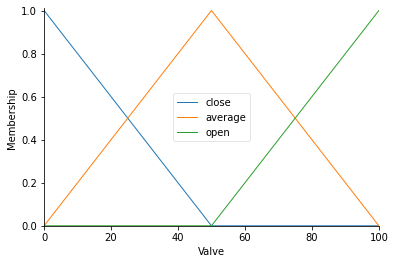

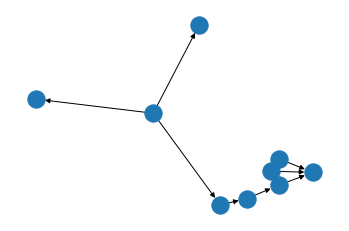

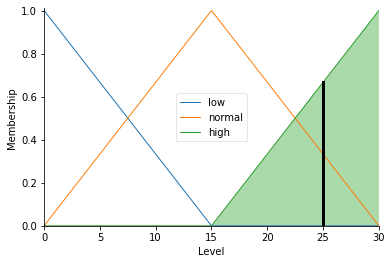

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

valve = ctrl.Antecedent(np.arange(0,101,1),'Valve') 
level = ctrl.Consequent(np.arange(0,31,1),'Level')  

# Type
valve['close'] = fuzz.trimf(valve.universe,[0,0,50])     
valve['average'] = fuzz.trimf(valve.universe,[0,50,100]) 
valve['open'] = fuzz.trimf(valve.universe,[50,100,100]) 

level['low'] = fuzz.trimf(level.universe,[0,0,15])    
level['normal'] = fuzz.trimf(level.universe,[0,15,30]) 
level['high'] = fuzz.trimf(level.universe,[15,30,30]) 

valve.view()

rule1=ctrl.Rule(valve['close'] , level['low'])
rule2=ctrl.Rule(valve['average'] , level['normal'])
rule3=ctrl.Rule(valve['open'] , level['high'])

rule1.view()

level_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
leveling = ctrl.ControlSystemSimulation(level_ctrl)
leveling.input['Valve'] = 100
leveling.compute()
print(leveling.output['Level'])
level.view(sim = leveling)